In [84]:
import os
import csv
import numpy  as np
import pandas as pd

import matplotlib
matplotlib.use('nbagg')

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data_folder = "/Users/WillC/Documents/Rutgers/3rd_Year/Spring_Semester/intro-data-science/neolithic_prediction_modeling/data/EUROEVOL_Dataset"
data_file = "EUROEVOL09-07-201516-34_CommonSites.csv"
commonsites = os.path.join(data_folder, data_file)
df = pd.read_csv(commonsites, sep=',', error_bad_lines=False)

height_data_folder = 'calculated_aqua_distances'
height_data_file = 'ireland_aqua_distance.csv'
commonsites = os.path.join(height_data_folder, height_data_file)
height_df = pd.read_csv(commonsites, sep=',', error_bad_lines=False)

df.head(10)
# height_df.head(10)

Skipping line 2378: expected 5 fields, saw 6
Skipping line 4392: expected 5 fields, saw 9



,Country,Latitude,Longitude,SiteID,SiteName
0,France,47.5100,6.80000,S1000,Pierre Folle
1,France,48.2300,0.16000,S1001,A 28 Nord
2,France,48.2300,0.16000,S1002,A 28
3,Germany,50.7886,6.07437,S1003,"Aachen, Lousberg"
4,Netherlands,51.4200,5.29000,S1004,Aardhorst-Vessem
5,Sweden,55.4000,13.60000,S1007,Abbekås
6,Great Britain,51.9691,-5.08230,S1010,Abermawr I
7,Great Britain,51.6800,-1.26130,S1011,Abingdon
8,France,46.6300,0.59000,S1012,Abri de Bellefonds
9,Belgium,50.2500,4.90000,S1014,Abri des Autours


In [85]:
country1 = ''
country2 = 'Ireland'

country_df = df.where((df['Country'] == country1) | (df['Country'] == country2))
# country_df = df
# set min and max latitude and longitude
minlat = country_df['Latitude'].min()
maxlat = country_df['Latitude'].max()
minlon = country_df['Longitude'].min()
maxlon = country_df['Longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

country_df = country_df.dropna()

In [86]:
# set min and max latitude and longitude
minlat = height_df['Latitude'].min()
maxlat = height_df['Latitude'].max()
minlon = height_df['Longitude'].min()
maxlon = height_df['Longitude'].max()

difflat = maxlat - minlat
difflon = maxlon - minlon

minlat -= (difflat / 10) * 2
maxlat += (difflat / 10) * 2
minlon -= (difflon / 10) * 2
maxlon += (difflon / 10) * 2


height_df = height_df.dropna()

In [103]:
m = Basemap(projection='cyl',
            llcrnrlat=minlat,
            urcrnrlat=maxlat,     
            llcrnrlon=minlon,
            urcrnrlon=maxlon,
            resolution='l')

m.drawparallels(np.arange(int(minlat),int(maxlat),1),labels=[1,0,0,0])
m.drawmeridians(np.arange(int(minlon),int(maxlon),1),labels=[0,0,0,1])
m.fillcontinents(color='None')

m.drawcoastlines()
m.drawcountries()
m.drawstates()
# m.drawrivers()
# m.fillcontinents(color='#04BAE3', lake_color='#FFFFFF')
# m.drawmapboundary(fill_color='#FFFFFF')
# m.bluemarble()

heightlat = np.array(height_df['Latitude'].tolist())
heightlon = np.array(height_df['Longitude'].tolist())
z = np.array(height_df['Elevation'].tolist())
x, y = m(heightlon, heightlat)
plt.scatter(x, y, c=z, s=1)
plt.colorbar(label='height (m)')

lat = np.array(country_df['Latitude'].tolist())
lon = np.array(country_df['Longitude'].tolist())

x, y = m(lon, lat)
m.plot(x, y, 'r.', markersize=2)

plt.title('Ireland Elevation Heatmap,\nRed = Artifact Location')
plt.xlabel('\n\n\nLongitude')
plt.ylabel('Latitude\n\n\n')

Text(0,0.5,u'Latitude\n\n\n')

<IPython.core.display.Javascript object>


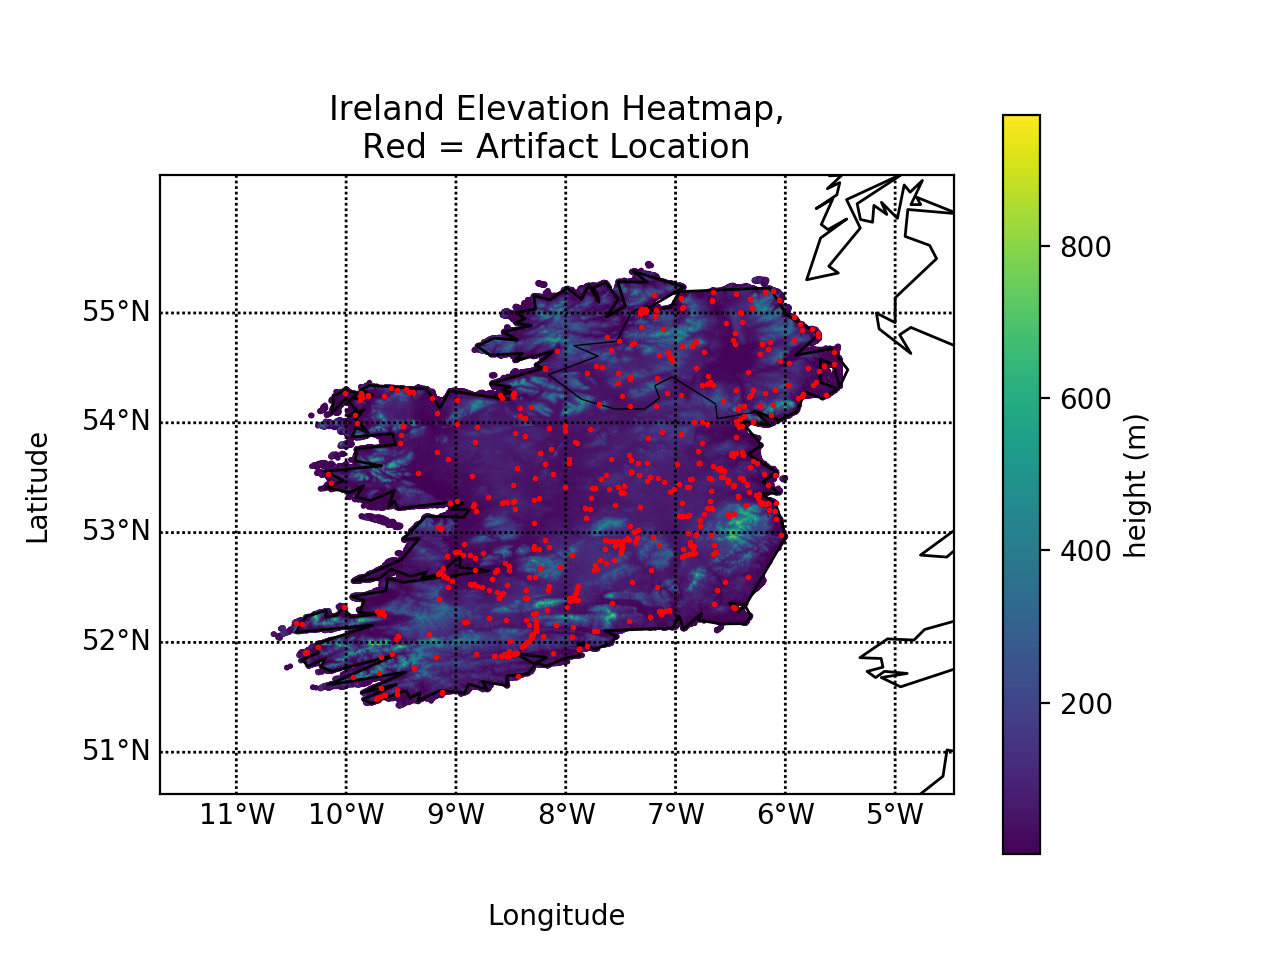

In [104]:
plt.show()